In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random
import pandas as pd
%matplotlib inline

In [10]:
inputx = np.random.randn(2,1,3,3)

In [11]:
conved_x,conv_param = conv_forward(inputx,3,1,3)
dx,(dw,db) = conv_backword(inputx,2 * conved_x,conv_param,3,1,3)

In [12]:
db

array([-15.03574649, -51.58389267,  59.88970249])

In [13]:
conv_param[1]

array([-0.49938279, -1.11908355,  1.56630019])

In [14]:
lr = 0.001
log = []
for i in range(3000):
    conved_x,_ = conv_forward(inputx,3,1,3,conv_param)
    dx,(dw,db) = conv_backword(inputx,2 * conved_x,conv_param,3,1,3)
    
    (w,b) = conv_param
    w -= dw * lr
    b -= db * lr
    
    loss = np.sum(conved_x * conved_x)
    log.append(loss)

<AxesSubplot:>

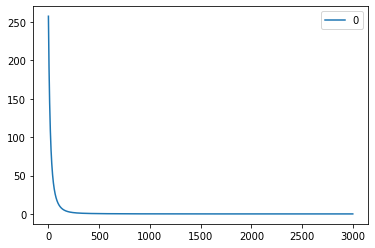

In [15]:
pd.DataFrame(log[:]).plot()

In [18]:
def conv_forward(inputx,kernel_size,pad,filters,params = None):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    inputx -- input images, array of shape (batch_number,channel,height,width)
    kernel_size -- size of kernel 
    pad -- padding number
    filters -- number of filters = number of channels of outputs
    params - weights and bias passed in
        
    Returns:
    x_out -- conv output, numpy array of shape (batch_number, channel, new_height, new_width)
    (w,b) -- weights and bias used for backward propagation
    """
    
    N, C, H, W = inputx.shape
    if not params:
        w = np.random.randn(filters,C,kernel_size,kernel_size)
        b = np.random.randn(filters)
    else:
        (w,b) = params
    
    x_pad = np.pad(inputx, ((0, 0), (0, 0), (pad, pad), (pad, pad)), mode='constant')
    x_pad_H,x_pad_W = x_pad.shape[2:]
    
    
    x_out = np.zeros((N, filters, x_pad_H - kernel_size + 1, x_pad_W - kernel_size + 1))
    for n in range(N):
        for f in range(filters):
            for i in range(x_pad_H - kernel_size + 1):
                for j in range(x_pad_W - kernel_size + 1):
                    begin_x_cord = i
                    end_x_cord = i + kernel_size
                    begin_y_cord = j 
                    end_y_cord = j + kernel_size
                    window = x_pad[n,:,begin_x_cord:end_x_cord,begin_y_cord:end_y_cord]
                    x_out[n,f,i,j] = np.sum(window * w[f]) + b[f]
    #print((N, filters, x_pad_H - kernel_size, x_pad_W - kernel_size))
    return x_out,(w,b)            
    
def conv_backword(x_input,dy,params,kernel_size,pad,filters):
    """
    Implement the backward propagation for a convolution function
    
    Arguments:
    x_input -- input images, array of shape (batch_number, channel, height, width)
    dy -- gradient of the cost with respect to the output of the conv layer y, numpy array of shape (batch_size, channel, height, width)
    params -- initial weights and bias, in the format of (w, b)
    kernel_size -- the size of kernel 
    pad -- pad number
    filters -- number of filters = number of channels of outputs
    
    Returns:
    dx -- gradient of the cost with respect to the input of the conv layer x_input,
          numpy array of shape (batch_number, channel, height, width)
    dw -- gradient of the cost with respect to the weights of the conv layer,
          numpy array of shape w
    db -- gradient of the cost with respect to the biases of the conv layer,
          numpy array of shape b
    """
    
    (w,b) = params
    x_pad = np.pad(x_input, ((0, 0), (0, 0), (pad, pad), (pad, pad)), 'constant')
    dx_pad = np.zeros_like(np.pad(x_input, ((0, 0), (0, 0), (pad, pad), (pad, pad)), 'constant'))
    N, C, H, W = x_input.shape
    x_pad_H,x_pad_W = x_pad.shape[2:]
    
    dx = np.zeros_like(x_input)
    dw = np.zeros_like(w)
    db = np.zeros_like(b)
    for n in range(N):       # ith image
        for f in range(filters):   # fth filter
            for i in range(x_pad_H - kernel_size + 1):
                for j in range(x_pad_W - kernel_size + 1):
                    begin_x_cord = i
                    end_x_cord = i + kernel_size
                    begin_y_cord = j 
                    end_y_cord = j + kernel_size
                    window = x_pad[n,:,begin_x_cord:end_x_cord,begin_y_cord:end_y_cord]
                    db[f] += dy[n, f, i, j]
                    dw[f] += dy[n, f, i, j] * window
                    dx_pad[n,:,begin_x_cord:end_x_cord,begin_y_cord:end_y_cord] += w[f] * dy[n, f, i, j]
    dx = dx_pad[:, :, pad:pad+H, pad:pad+W]
    return dx,(dw,db)

In [17]:
import pickle
with open('xy.pkl','rb') as whdl:
    (IM_train,y_train,IM_test) = pickle.load(whdl)

FileNotFoundError: [Errno 2] No such file or directory: 'xy.pkl'

In [11]:
IM_train[0].shape

(100, 100, 3)

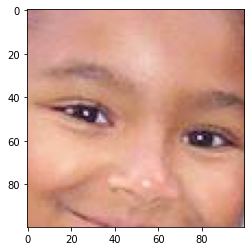

In [12]:
plt.imshow(IM_train[188])

In [13]:
target = np.expand_dims(np.transpose(IM_train[188],[2,0,1]),0)

In [14]:
target.shape

(1, 3, 100, 100)

In [15]:
inputx = np.random.randn(1,1,100,100)

In [16]:
target = target / 255

In [17]:
inputx = np.expand_dims(np.sum(target,axis=1),1)
inputx = inputx

In [18]:
conved_x,conv_param = conv_forward(inputx,1,0,3)
dx,(dw,db) = conv_backword(inputx,2 * conved_x,conv_param,1,0,3)

In [19]:
showimg = (conved_x - np.min(conved_x)) / (np.max(conved_x) - np.min(conved_x))

In [20]:
showimg.shape

(1, 3, 100, 100)

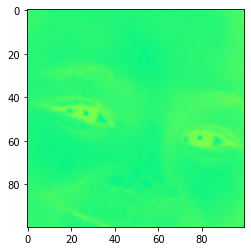

In [21]:
plt.imshow(np.transpose(showimg[0],[1,2,0]))

In [22]:
lr = 0.1
log = []
norm = len(inputx.reshape(-1))
for i in range(100):
    conved_x,_ = conv_forward(inputx,1,0,3,conv_param)
    dx,(dw,db) = conv_backword(inputx,(2 * conved_x - 2 * target) / norm,conv_param,1,0,3)
    
    (w,b) = conv_param
    w -= dw * lr
    b -= db * lr
    
    loss = np.sum((target - conved_x) *(target -  conved_x))  / norm
    log.append(loss)
    print(i,loss)

0 4.939890008961461
1 0.026880485438575952
2 0.02081570404901148
3 0.020638581387924487
4 0.020470045312355734
5 0.020303029911565636
6 0.02013751315699219
7 0.019973481591164063
8 0.019810921887408715
9 0.019649820838646453
10 0.019490165356305256
11 0.019331942469257422
12 0.019175139322765697
13 0.019019743177438944
14 0.018865741408197103
15 0.018713121503245472
16 0.018561871063058226
17 0.018411977799370982
18 0.018263429534182477
19 0.018116214198765163
20 0.01797031983268467
21 0.017825734582828125
22 0.01768244670244111
23 0.01754044455017334
24 0.01739971658913285
25 0.017260251385948677
26 0.01712203760984197
27 0.016985064031705452
28 0.01684931952319106
29 0.016714793055805893
30 0.016581473700016156
31 0.016449350624359222
32 0.016318413094563625
33 0.016188650472676983
34 0.01606005221620167
35 0.01593260787723836
36 0.015806307101637152
37 0.01568113962815636
38 0.015557095287628856
39 0.01543416400213587
40 0.0153123357841882
41 0.015191600735914827
42 0.01507194904825

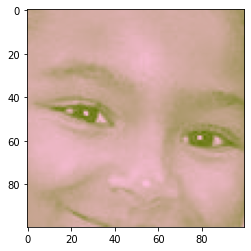

In [23]:
resultimg = (conved_x - np.min(conved_x)) / (np.max(conved_x) - np.min(conved_x))
resultimg = resultimg
plt.imshow(np.transpose(resultimg[0],[1,2,0]))

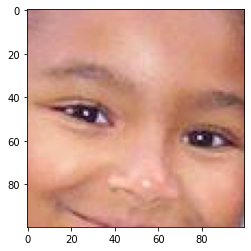

In [24]:
resultimg = (target - np.min(target)) / (np.max(target) - np.min(target))
plt.imshow(np.transpose(resultimg[0],[1,2,0]))